In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-1-csv/zomato.csv
/kaggle/input/zomato-dataset/zomato.csv


# Step 1: Load and Explore the Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/kaggle/input/zomato-dataset/zomato.csv")

Understand the Data:

df.info(): Provides a summary of columns, data types, and missing values.
df.describe(): Gives statistics of numerical columns (mean, median, etc.).
df.head(): Displays the first five rows.

In [4]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:

print(df.describe())



              votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000


In [6]:
print(df.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

# Step 2: Data Cleaning

This step ensures data consistency and removes irrelevant or problematic record.ds:

Remove Duplicate Records:

In [7]:
df.drop_duplicates(inplace=True)


Handle Missing Values:

In [8]:
print(df['rate'].unique())


['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [9]:
# Extract numeric part of the rate (e.g., '4.1/5' -> 4.1)
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+|\d+)').astype(float)


In [10]:
# Fill missing values with the median
df['rate'] = df['rate'].fillna(df['rate'].median())


In [11]:
# Confirm the data type and summary statistics
print(df['rate'].dtypes)
print(df['rate'].describe())


float64
count    51717.000000
mean         3.700362
std          0.395391
min          1.800000
25%          3.500000
50%          3.700000
75%          3.900000
max          4.900000
Name: rate, dtype: float64


In [12]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)


# Step 3: Exploratory Data Analysis (EDA).

Now, explore relationships between variables and uncover trend


Separate Categorical and Numerical Columns:s.

In [13]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include='number').columns
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['url', 'address', 'name', 'online_order', 'book_table', 'phone',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for_two_people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')
Numerical Columns: Index(['rate', 'votes'], dtype='object')


# Step 4: Data Visualization

Use Matplotlib and Seaborn to visualize trends and correlations.ty:

Online Delivery Availability:

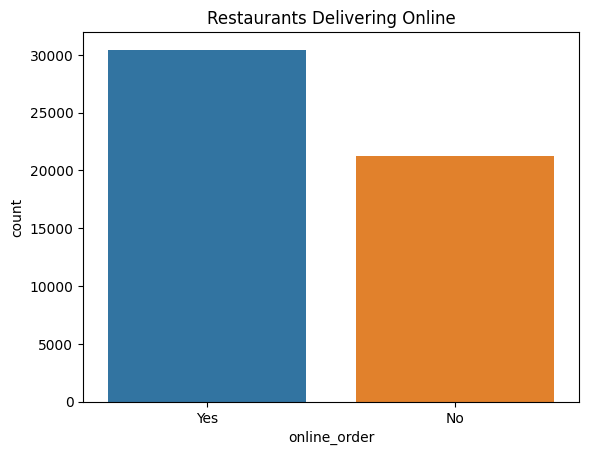

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='online_order', data=df)
plt.title('Restaurants Delivering Online')
plt.show()


Table Booking Preference:

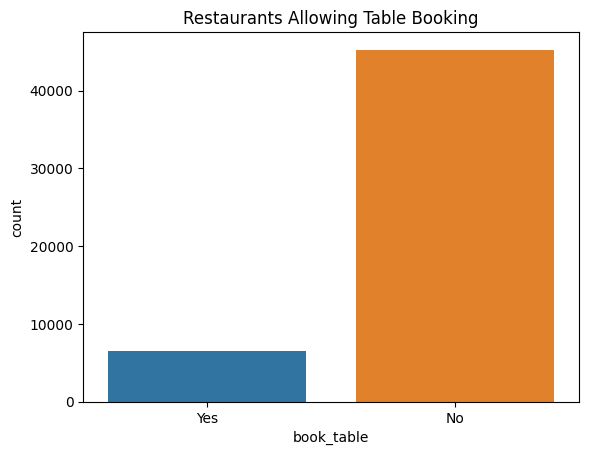

In [15]:
sns.countplot(x='book_table', data=df)
plt.title('Restaurants Allowing Table Booking')
plt.show()


Relationship Between Table Booking and Ratings:

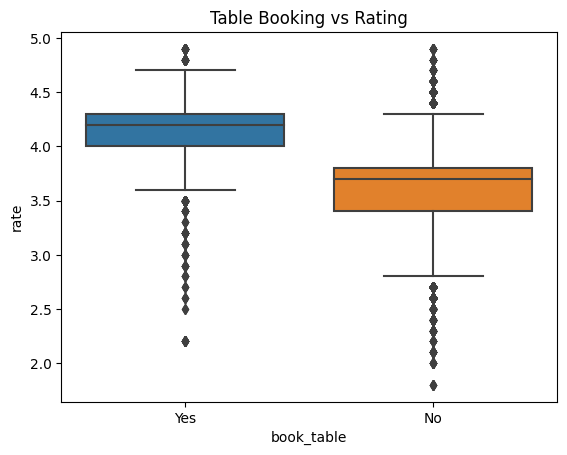

In [16]:
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Table Booking vs Rating')
plt.show()


Top Restaurant Locations:



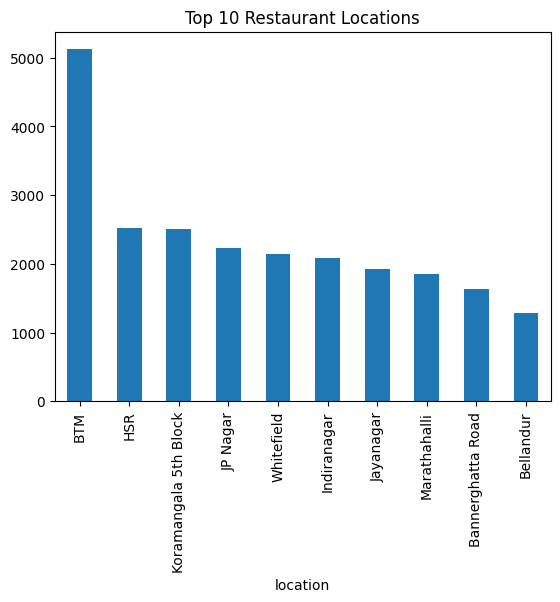

In [17]:
location_counts = df['location'].value_counts().head(10)
location_counts.plot(kind='bar')
plt.title('Top 10 Restaurant Locations')
plt.show()


Rating Distribution (Gaussian):

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


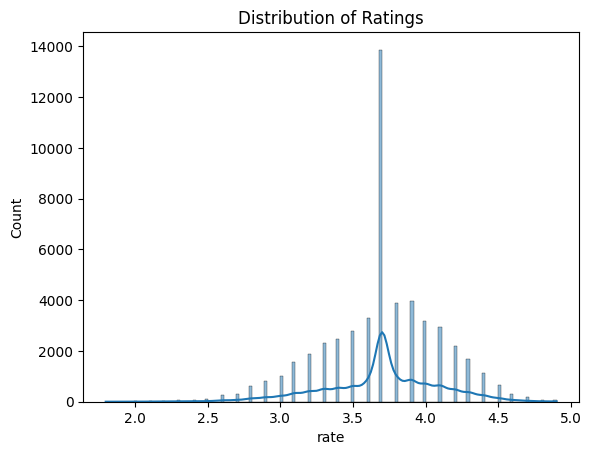

In [18]:
sns.histplot(df['rate'], kde=True)
plt.title('Distribution of Ratings')
plt.show()


Popular Restaurant Chains:

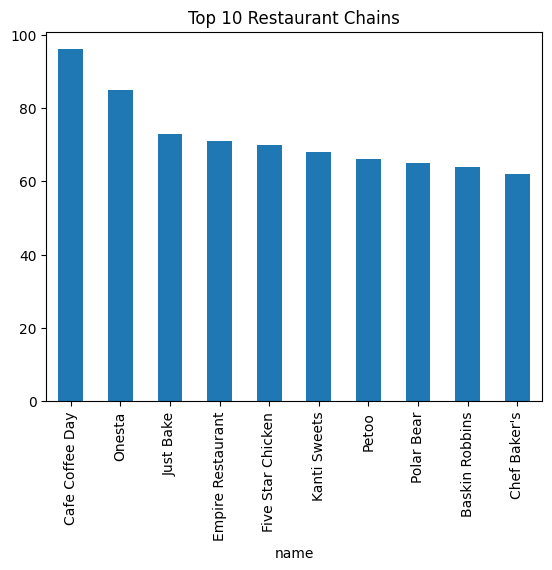

In [19]:
df['name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Restaurant Chains')
plt.show()


# Step 5: Key Insights

Summarize what you learned:

Trends:
Online delivery is highly prevalent.
Popular areas like Koramangala have the most restaurants.
Correlations:
Table booking is linked to higher ratings.
Casual dining dominates the
Service Gaps:
Identify underserved locations.
Opportunities for affordable restaurants in high-cost areas

# Step 6: Solving Real-World Problems

Applications of the dataset:

Business Decision-Making: Determine where to open new restaurants based on demand.
Service Improvements: Optimize services like table booking to attract higher ratings.
Pricing Strategies: Analyze cost trends for different restaurant types..
 market.
